![logo](logo.png)

# Datos Mex

`datos_mex` es una librería construida en Python con la finalidad de consultar datos públicos de México, para el Api del Banco de México ([Banxico](https://www.banxico.org.mx/SieAPIRest/service/v1/)) y el Instituto Nacional de Estadística  y Geografía ([INEGI](https://www.inegi.org.mx/servicios/api_indicadores.html)) . Estas dos instituciones publican información de la economía real como financiera.

`datos_mex` esta construida a partir de `pandas` por lo que las consultas retornadas son `pd.Dataframe()`, teniendo asi integración con otras librerías como `Matplotlib`, `Seaborn` o `Statsmodels`.

## API INEGI

### Token

Puedes obtener un Token en la siguiente [URL](https://www.inegi.org.mx/app/api/denue/v1/tokenVerify.aspx), mientras que los indicadores los puedes consultar en [API](https://www.inegi.org.mx/servicios/api_indicadores.html), en la misma pagina se consultan el BIE como el BISE.

In [4]:
# Librerias 
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt,numpy as np

# Token
from datos_mex.inegi import banco_de_indicadores
token= '713ad977-de9d-9fe8-1a8c-5ffb95ee93a6'

# A partir de esta se realiza la consulta 
inegi = banco_de_indicadores(token)

#### **Parametros de la consulta**

Una consulta se puede realizar a partir de los siguientes comandos: 

- banco_de_indicadores(token).request()
- inegi.request()

Parametros request 

- var: str
- bank: str
    - BIE: Banco de indicadores económico
    - BISE: Banco de Indicadores 
- start (opcional):  YYYY-MM-DD
- end (opcional): YYYY-MM-DD
- name (opcional): list

### Banco de Información Económica (BIE)

En el BIE se encuentra información del PIB por el lado de la demanda y de la oferta, Indices de precios, Cuentas nacionales, Tasas de ocupación y desocupación, así como Encuestas periódicas que realiza esta institución como la ENOE, EMOE, EMIM, ENEC, entre otros.

#### Consulta parámetros obligatorios 


**Consulta:**
- Producto Interno Bruto: 735879 
- Actividades primarias: 735882
- Actividades secundarias: 735883
- Actividades terciarias: 735888

**Nota:** En caso de no especificar ningún uno parámetro adicional te devuelve la consulta global

In [6]:
# Indicadores 
indbie = '735879,735882,735883,735888'

# Consulta 
bie1 = inegi.request(var=indbie, bank='BIE')
bie1.head()

c:\Users\el\OneDrive\data_mx\data_mx\inegi\_banco_de_indicadores.py:139: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TIME_PERIOD'] = pd.to_datetime(data['TIME_PERIOD'])


,TIME_PERIOD,735879,735882,735883,735888
0,1980-01-01,1.040137e+07,419192.590,4014172.291,5383811.941
1,1980-02-01,1.034235e+07,386092.639,4003454.651,5369491.411
2,1980-03-01,1.039273e+07,424698.389,4131481.268,5257710.872
3,1980-04-01,1.092767e+07,412868.415,4149062.192,5745881.173
4,1981-01-01,1.134585e+07,438850.326,4412239.779,5856656.820


#### Consulta con parámetros no obligatorios

**Datos:**
- Name: Identificadores que reemplazaran a los códigos del API, funciona de Izquierda a derecha
- Inicio: Limite inferior
- Fin: Limite superior 


In [68]:
# Indicadores 
name = ['pib', 'act_1', 'act_2', 'act_3']
inicio = '2018-04-01' 
fin = '2022-01-01' 

# Consulta 
bie2 = inegi.request(var=indbie, bank='BIE',name=name, start = inicio, end = fin)
bie2.tail()

c:\Users\el\OneDrive\data_mx\data_mx\inegi\_banco_de_indicadores.py:139: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TIME_PERIOD'] = pd.to_datetime(data['TIME_PERIOD'])


,fecha,pib,act_1,act_2,act_3
9,2021-01-01,2.284084e+07,758035.123,7265140.515,1.360932e+07
10,2021-02-01,2.362332e+07,872394.447,7396306.801,1.406373e+07
11,2021-03-01,2.320473e+07,720485.108,7417864.609,1.381038e+07
12,2021-04-01,2.395044e+07,957920.499,7449600.892,1.427720e+07
13,2022-01-01,2.344404e+07,762523.258,7576903.255,1.381633e+07


#### Gráfico 



Text(0.5, 1.0, 'PIB y los sectores economicos \n Valores nominales')

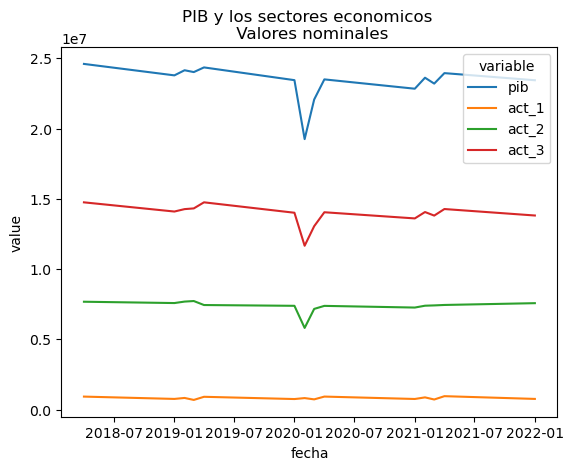

In [69]:
bie2 = pd.melt(bie2, id_vars='fecha')
titulo = 'PIB y los sectores economicos \n Valores nominales'
sns.lineplot(bie2, x = 'fecha', y = 'value', hue='variable').set_title(titulo)

### Banco de indicadores (BISE) 


En el BISE resume los indicadores mas importantes de las encuestas recabadas por el INEGI como por ejemplo: 
- ENIGH (Encuesta de Ingreso y Gasto de los Hogares) el ingreso promedio trimestral por hogar según el decil
- Censos de población destaca población total, por género o rango de edades 

También hay variables cualitativas de Educación, Economia, Geografia,  Gobierno y Salud


#### Consulta de la población total en los Estados Unidos Mexicanos

In [59]:
# Indicadores
indbise = '1002000001' 
name = ['pop_tot']

# Consulta
bise = inegi.request(var=indbise, bank='BISE', name=name)
bise.tail()

,fecha,pop_tot
10,2000-01-01,97483412.0
11,2005-01-01,103263388.0
12,2010-01-01,112336538.0
13,2015-01-01,119938473.0
14,2020-01-01,126014024.0


## API Banco de Mexico

### Token

Puedes obtener un Token en la siguiente [URL](https://www.banxico.org.mx/SieAPIRest/service/v1/token), mientras que los indicadores los puedes consultar en [API](https://www.banxico.org.mx/SieAPIRest/service/v1/)

In [7]:
### Token
from datos_mex.banxico import sie
tokenbm = 'b5e3c6286b700cb562ab06fca14c02a366b3e0a215dc1c0868fbe470839b2171'

# A partir de esta se realiza la consulta 
banxico = sie(tokenbm)

### **Parametros**
Una consulta se puede realizar a partir de los siguientes comandos: 

- sie(token).request()
- banxico.request()

Parametros request:
- var: str
- start (opcional): YYYY-MM-DD
- end (end): YYYY-MM-DD



### Sistema de información Económica (SIE)

En el SIE principalmente se puede encontrar información financiera como Tasas de interés, UDIS, Base Monetaria, Tipo de Cambio, Subastas de Valores o Encuestas realizadas por esta institución así como el índice de precios, PIB o Indicadores laborales que son elaborados por otras instituciones.


#### Valor de los UDIS


In [8]:
#### Parametros
start = '2010-1-1'
udis = 'SP68257'

#### Consulta 
udis = banxico.request(var= udis, start= start)
udis.tail()

,fecha,Valor de UDIS
5499,2025-01-21,8.365472
5500,2025-01-22,8.365699
5501,2025-01-23,8.365925
5502,2025-01-24,8.366152
5503,2025-01-25,8.366378


**Notas:** 
- En el caso del API de Banxico no es necesario renombrar las consultas, debido a que ya poseen identificadores  
- Al momento de descargar datos desde el SIE puedes conocer el indicador de las variables para el API, debido a que se encuentran dentro del .xlsx en la fila de fecha 

##### Gráfico

Text(0.5, 1.0, 'Valor de UDIS')

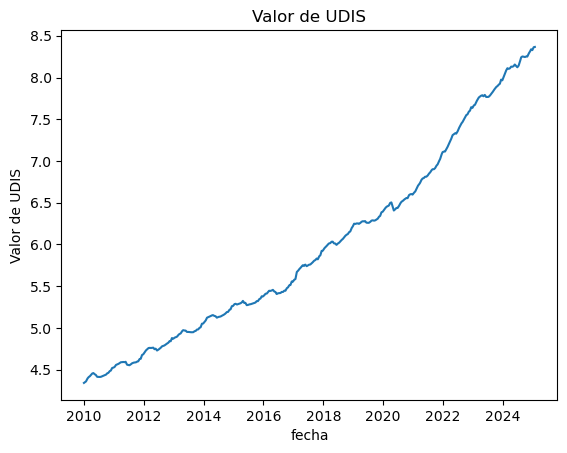

In [9]:
# Plot
titulo = 'Valor de UDIS'
sns.lineplot(udis, x ='fecha', y ='Valor de UDIS').set_title(titulo)

#### Consulta de la Base Monetaria, Crédito Interno y Activos Internacionales

**Consulta:**
- Base Monetaria (BM): SF43703
- Activos Internacionales (AIC): SF43704
- Crédito Interno (CIN): SF43706

In [10]:
# Indicadores 
var = 'SF43703,SF43704,SF43706'

# Consulta 
bm = banxico.request(var= var)
bm.tail()

,fecha,Activos Internacionales Netos,Crédito Interno Neto,Base Monetaria
1512,2024-12-13,4678575.7,-1455509.3,3223066.4
1513,2024-12-20,4653978.9,-1399500.7,3254478.2
1514,2024-12-27,4698177.2,-1403433.5,3294743.7
1515,2025-01-03,4798075.1,-1493095.0,3304980.1
1516,2025-01-10,4795593.9,-1497493.5,3298100.4


##### Gráfico de BM, AIC, CIN

Text(0.5, 1.0, 'BM, AIC, CIN')

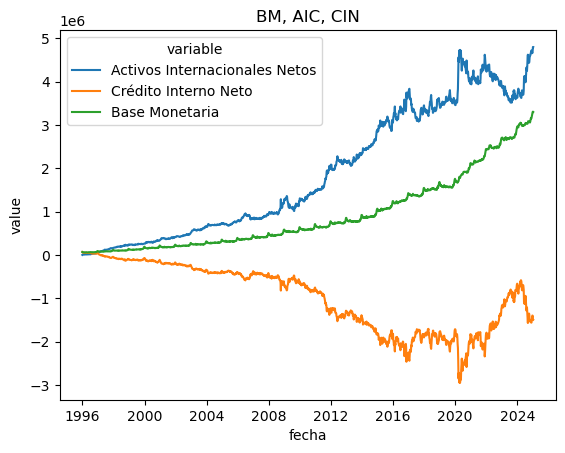

In [11]:
# Gráfico 
bm1 = bm.melt(id_vars='fecha')
titulo = 'BM, AIC, CIN'
sns.lineplot(bm1, x = 'fecha', y = 'value', hue='variable').set_title(titulo)

## Auxiliares 

Estos son una serie de códigos auxiliares que facilitan el procesamiento de las consultas 



### Renombrar (rename)

La función **rename** cambia los valores de los encabezados de un data frame mediante el index

#### **Parametros:**
- data: DataFrame
- names: List

In [12]:
# Libreria
from datos_mex.data_format import rename

# Renombrar variables 
names = ['fecha','BM', 'CIN', 'AIC']
bm = rename(bm, names)

bm.tail()

,fecha,BM,CIN,AIC
1512,2024-12-13,4678575.7,-1455509.3,3223066.4
1513,2024-12-20,4653978.9,-1399500.7,3254478.2
1514,2024-12-27,4698177.2,-1403433.5,3294743.7
1515,2025-01-03,4798075.1,-1493095.0,3304980.1
1516,2025-01-10,4795593.9,-1497493.5,3298100.4


### Agrupar (group_by_time)

La función **group_by_time()** es un fork de la función pandas.DataFrame.groupby(), está únicamente funciona con consultas realizadas con esta librería. La finalidad de esta función es agrupar los datos según el mes o año

#### **Parametros:** 

**Data:** DataFrame

**Year:** bool
- True: Año
- False: Mes 

**Operation:** 'str'
- mean
- meadian
- sum


In [13]:
# Libreria
from datos_mex.data_format import group_by_time 

# Base Monetaria por meses 
bm_m = group_by_time(bm, False,'mean')
bm_m.tail()


,fecha,BM,CIN,AIC
345,2024-09-01,4525193.625,-1453882.950,3071310.675
346,2024-10-01,4511781.675,-1445313.150,3066468.525
347,2024-11-01,4664126.300,-1537982.600,3126143.700
348,2024-12-01,4683622.925,-1441827.175,3241795.750
349,2025-01-01,4796834.500,-1495294.250,3301540.250
